In [1]:
import warnings
# Deshabilitar todos los warnings
warnings.filterwarnings("ignore")
    
import pandas as pd
# Se carga el archivo de datos ya pre-procesado
df = pd.read_csv("./data/datosv2_clean.csv")
print(df.shape)
df.head()

(81289, 32)


,Unnamed: 0,N256,N258,N263,N284,N316,N317,N318,N319,N321,...,ID_UC_PHASE,ID_REGION,ID_UC_METER_TYPE,ID_UC_CLASS,ID_LOCALITY,ID_UC_READING_CYCLE,ID_MUNICIPALITY,UC_COL_ID_03,UC_COL_ID_05,RESULTADO
0,0,120.0,613.0,424.0,432.0,120.0,493.0,120.0,533.0,120.0,...,4.0,50,0.0,1,1,5026.0,101,90,TR,10
1,1,234.0,613.0,424.0,432.0,234.0,493.0,234.0,533.0,234.0,...,4.0,50,3.0,1,1,3005.0,101,90,TR,10
2,2,381.0,613.0,424.0,432.0,381.0,493.0,381.0,533.0,381.0,...,2.0,30,0.0,1,1,3014.0,102,38,TR,10
3,3,448.0,613.0,424.0,432.0,469.0,493.0,475.0,533.0,453.0,...,4.0,50,0.0,1,1,5030.0,101,4,TR,10
4,4,448.0,613.0,424.0,432.0,469.0,493.0,475.0,533.0,453.0,...,4.0,50,3.0,1,1,5030.0,101,4,TR,10


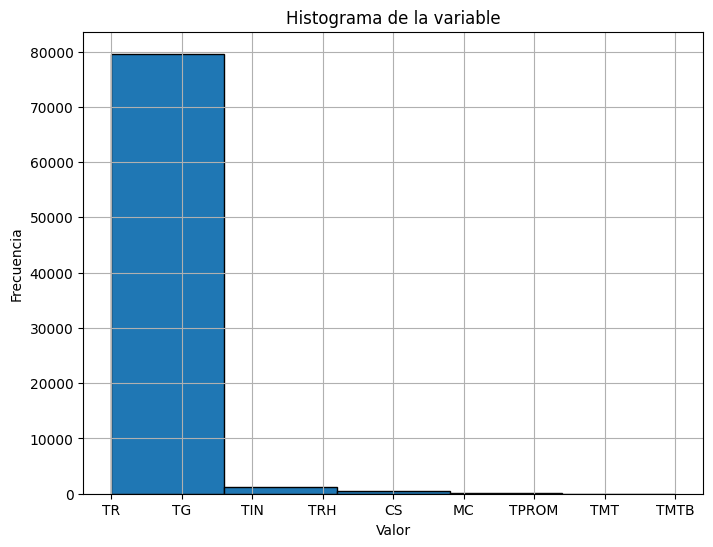

In [2]:
import matplotlib.pyplot as plt

# Graficar un histograma
plt.figure(figsize=(8, 6))
plt.hist(df['UC_COL_ID_05'], bins=5, edgecolor='black')  # Cambia el número de bins según tu preferencia
plt.title('Histograma de la variable')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [4]:
# Calcular la distribución de valores de la variable y crear una tabla
tabla_distribucion = df['UC_COL_ID_05'].value_counts().reset_index()
tabla_distribucion.columns = ['Valor', 'Frecuencia']

# Mostrar la tabla de distribución de la variable
print(tabla_distribucion)

   Valor  Frecuencia
0     TR       65050
1     TG       14561
2    TIN         636
3    TRH         549
4     CS         403
5     MC          38
6    TMT          30
7  TPROM          12
8   TMTB          10


Para efectos del ejercicio y con el ánimo de reducir las variables al momento de disponibilizar el modelo se decide discriminar las tarifas con conteo menor equivalente al 1% de los datos, es decir, a 813 unidades de consumo. Lo que equivale a eliminar las filas cuyas tarifas se en cuentre en : "TIN", "TRH", "CS", "MC", "TMT", "TPROM", "TMTB"

In [5]:
# Valores que se desean eliminar
valores_a_eliminar = ["TIN", "TRH", "CS", "MC", "TMT", "TPROM", "TMTB"]

# Eliminar las filas con los valores específicos en la columna 'variable'
df = df[~df['UC_COL_ID_05'].isin(valores_a_eliminar)]

# Calcular la distribución de valores de la variable y crear una tabla
tabla_distribucion = df['UC_COL_ID_05'].value_counts().reset_index()
tabla_distribucion.columns = ['Valor', 'Frecuencia']

# Mostrar la tabla de distribución de la variable
print(tabla_distribucion)

  Valor  Frecuencia
0    TR       65050
1    TG       14561


In [7]:
# Cambiar valores específicos en la columna 'variable'
valores_a_cambiar = {"TR": 0, "TG": 1}  # Diccionario de valores a cambiar {valor_original: valor_nuevo}
df['UC_COL_ID_05'] = df['UC_COL_ID_05'].replace(valores_a_cambiar)

# Calcular la distribución de valores de la variable y crear una tabla
tabla_distribucion = df['UC_COL_ID_05'].value_counts().reset_index()
tabla_distribucion.columns = ['Valor', 'Frecuencia']

# Mostrar la tabla de distribución de la variable
print(tabla_distribucion)

   Valor  Frecuencia
0      0       65050
1      1       14561


In [9]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,N256,N258,N263,N284,N316,N317,N318,N319,N321,N322,...,ID_UC_PHASE,ID_REGION,ID_UC_METER_TYPE,ID_UC_CLASS,ID_LOCALITY,ID_UC_READING_CYCLE,ID_MUNICIPALITY,UC_COL_ID_03,UC_COL_ID_05,RESULTADO
0,120.0,613.0,424.0,432.0,120.0,493.0,120.0,533.0,120.0,462.0,...,4.0,50,0.0,1,1,5026.0,101,90,0,10
1,234.0,613.0,424.0,432.0,234.0,493.0,234.0,533.0,234.0,462.0,...,4.0,50,3.0,1,1,3005.0,101,90,0,10
2,381.0,613.0,424.0,432.0,381.0,493.0,381.0,533.0,381.0,462.0,...,2.0,30,0.0,1,1,3014.0,102,38,0,10
3,448.0,613.0,424.0,432.0,469.0,493.0,475.0,533.0,453.0,462.0,...,4.0,50,0.0,1,1,5030.0,101,4,0,10
4,448.0,613.0,424.0,432.0,469.0,493.0,475.0,533.0,453.0,462.0,...,4.0,50,3.0,1,1,5030.0,101,4,0,10


In [14]:
from sklearn.ensemble import RandomForestClassifier
columnas_a_convertir = ['ID_UC_PHASE', 'ID_REGION', 'ID_UC_METER_TYPE', 'ID_UC_CLASS', 'ID_LOCALITY', 'ID_UC_READING_CYCLE', 'ID_MUNICIPALITY', 'UC_COL_ID_03', 'UC_COL_ID_05']
df[columnas_a_convertir] = df[columnas_a_convertir].astype(object)

X = df.drop("RESULTADO", axis=1)
y = df['RESULTADO']

# Inicializa el modelo de Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  

# Entrena el modelo con tus datos
random_forest.fit(X, y)

# Obtén la importancia de las características
importances = random_forest.feature_importances_

# Crea un DataFrame con las importancias de las características
feature_names = list(X.columns)
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)

# Muestra el ranking de importancia de las características
print(feature_importance_df)


                Feature  Importance
0   ID_UC_READING_CYCLE    0.063870
1                  N284    0.044402
2                  N256    0.043781
3                  N322    0.043239
4                  N588    0.043151
5                  N479    0.043046
6                  N319    0.042483
7                  N626    0.041600
8                  N628    0.041561
9                  N321    0.041419
10                 N535    0.040514
11                 N317    0.040497
12                 N529    0.040480
13                 N318    0.040320
14                 N627    0.040111
15                 N316    0.039917
16                 N536    0.039797
17                 N530    0.039673
18                 N258    0.037902
19                 N263    0.036412
20                 N555    0.036093
21         UC_COL_ID_03    0.033260
22      ID_MUNICIPALITY    0.021071
23          ID_UC_PHASE    0.019198
24            ID_REGION    0.014807
25     ID_UC_METER_TYPE    0.011835
26         UC_COL_ID_05    0

Se decide seleccionar las variables con mayor importancia y las que según el marco de negocio son indispensables a la hora de realizar una posible selección de unidades de consumo para revisión técnica, para un total de 10 características

In [15]:
# Seleccionar un subconjunto de columnas para crear un nuevo DataFrame
columnas_seleccionadas = ['ID_UC_READING_CYCLE', 'ID_MUNICIPALITY', 'ID_REGION', 'UC_COL_ID_05', 'N284', 'N256', 'N322', 'N588', 'N479', 'N319', 'RESULTADO']
nuevo_df = df[columnas_seleccionadas]

# Mostrar el nuevo DataFrame con las columnas seleccionadas
print(nuevo_df)

      ID_UC_READING_CYCLE ID_MUNICIPALITY ID_REGION UC_COL_ID_05   N284  \
0                  5026.0             101        50            0  432.0   
1                  3005.0             101        50            0  432.0   
2                  3014.0             102        30            0  432.0   
3                  5030.0             101        50            0  432.0   
4                  5030.0             101        50            0  432.0   
...                   ...             ...       ...          ...    ...   
81284              5004.0             101        50            0  135.8   
81285              5004.0             101        50            0  303.0   
81286              5004.0             101        50            0  432.0   
81287              3005.0             103        20            0  432.0   
81288              2018.0             103        20            0  167.6   

             N256        N322        N588   N479        N319  RESULTADO  
0      120.000000  462.00

In [17]:
PATH = './data/'
def guardar_csv(df, _PATH):
    df.to_csv(_PATH)
    

In [18]:
guardar_csv(nuevo_df, PATH+'datos_VF.csv')